# Argos Query Suggestions
This notebook scrapes the query suggestions from Argos.

In [1]:
#imports
import requests
import json
from fake_useragent import UserAgent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
ua = UserAgent()
#headers = {"user-agent": ua.chrome}
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

### Loading list of toys
all_items.txt is a text file of different toys that will be queried.

In [3]:
with open('all_items.txt') as f:
    contents = f.read().splitlines()
contents [:5]

['vehicle toys', 'sport', 'military toys', 'race cars', 'outer space toys']

## Loading pre-documented gender stereotyped toys
predoc_sterotyped_items.csv is a csv file of the different toys and their pre documented assigned gender stereotypes

In [4]:
stereo_toys = pd.read_csv('~/Desktop/485/Data/predoc_stereotyped_items.csv', delimiter =',')
stereo_toys

,BOY,GIRL,NEUTRAL
0,vehicle toys,doll,toy animals
1,sport,domestic toys,books
2,military toys,educational art,educational teaching
3,race cars,clothes,musical games
4,outer space toys,dollhouses,games
...,...,...,...
67,toy rocket,barbie furniture set,NaN
68,soccer ball,NaN,NaN
69,blue ipad,pink ipad,NaN
70,toy robots,NaN,NaN


### Some stat on the dataset

In [5]:
boy_toys = stereo_toys['BOY'].unique().tolist()
len(boy_toys)

71

In [6]:
girl_toys = stereo_toys['GIRL'].unique().tolist()
len(girl_toys)

64

In [7]:
neutral_toys = stereo_toys['NEUTRAL'].unique().tolist()
len(neutral_toys)

33

In [8]:
all_items = boy_toys + girl_toys + neutral_toys
len(all_items)

168

In [9]:
all_items = [x for x in all_items if isinstance(x, str)]

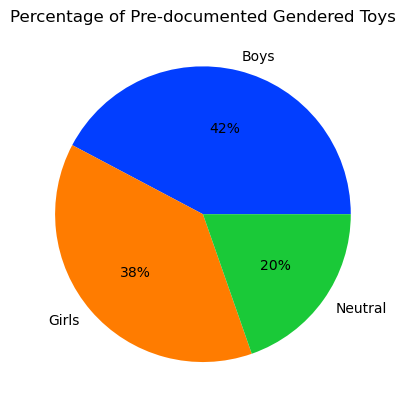

In [10]:
data = [71, 64, 33]
keys = ['Boys', 'Girls', 'Neutral']
  
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.title('Percentage of Pre-documented Gendered Toys')
plt.show()

This pie chart visualizes the percentage of toys assigned to genders. Boys have the highest percentage with girls being second and neutral the last.

## Preparing the data for query

### Adding "for"

In [11]:
new_content = [x.strip() for x in all_items]
new_content = [x.replace(' for','') for x in new_content]
new_content = [x.lower() for x in new_content]
new_content [:5]

['vehicle toys', 'sport', 'military toys', 'race cars', 'outer space toys']

In [13]:
#creating query format to put in the search engine
search_terms = [x+' for' for x in new_content]
search_terms [:5]

['vehicle toys for',
 'sport for',
 'military toys for',
 'race cars for',
 'outer space toys for']

## Search Engines and E-Com Sites

### Argos

In [14]:
from urllib.request import urlopen, Request
import urllib.parse as urlparse
from bs4 import BeautifulSoup
#custom_user_agent = "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0"
#headers={"User-Agent": custom_user_agent}

def argos_scrape(query):
   # params = {"qry": query}
    url_parse = urlparse.urlparse('https://www.argos.co.uk/suggest?term={query}%20f&fuzziness=true&size=5&includeFaq=true')
    query = url_parse.query
    url_dict = dict(urlparse.parse_qsl(query))
    # url_dict.update(params)
    url_new_query = urlparse.urlencode(url_dict)
    url_parse = url_parse._replace(query=url_new_query)
    new_url = urlparse.urlunparse(url_parse)
    req = Request(new_url, headers=headers)
    page = urlopen(req)
    soup = BeautifulSoup(page.read())
    return soup

In [15]:
def argos_scrape(query):
    url = f'https://www.argos.co.uk/suggest?term={query}%20f&fuzziness=true&size=5&includeFaq=true'
    # with open(url) as j:
    #    response = json.loads(j.read())
    response = requests.get(url, headers=headers, verify=False).json()
    return response
#['autoSuggest']['keywords']

### All together

In [16]:
def argos_auto(item):
    res = argos_scrape(item)
    suggestions = res['autoSuggest']['keywords']
    results = []
    for s in suggestions:
        results.append(s['value'])
    return results

## Run queries

In [17]:
#create dataframe
import pandas as pd
columns = ['platform', 'query', 'suggestions']
df = pd.DataFrame(columns = columns)
df

,platform,query,suggestions


In [18]:
def search(platform):
    if platform == 'Argos':
        return argos_auto(item)

In [23]:
#run below function with trial list of items before using contents
trial = ['plants','toys','doll']

In [24]:
columns = ['query', 'suggestions']

In [25]:
# trial run
import time
import warnings
warnings.filterwarnings('ignore')
data = []
for item in trial:
    result = argos_auto(item)
    values = [item, result]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    print(a_dictionary)
    time.sleep(1.5)
    data.append(a_dictionary)

{'query': 'plants', 'suggestions': ['artificial plant', 'plant pot', 'planter', 'plant', 'plants']}
{'query': 'toys', 'suggestions': ['toys', 'kids toys', 'toy storage', 'toy box', 'toy kitchen']}
{'query': 'doll', 'suggestions': ['designafriend doll', 'dolls', 'barbie doll', 'dolls pram', 'baby doll']}


In [26]:
#once the trial run is successful run the code with contents
warnings.filterwarnings('ignore')
data = []
for item in contents:
    result = argos_auto(item)
    values = [item, result]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    print(a_dictionary)
    time.sleep(1.5)
    data.append(a_dictionary)

{'query': 'vehicle toys', 'suggestions': ['vehicle toy', 'building blocks vehicle toy', 'construction digger excavator vehicle toy', 'blocks vehicle toy', 'esports vehicle toy']}
{'query': 'sport', 'suggestions': ['nintendo switch sports', 'sports watch', 'sports', 'switch sports', 'sport']}
{'query': 'military toys', 'suggestions': []}
{'query': 'race cars', 'suggestions': ['race car', 'race car set', 'lego ninjago lloyds race car', 'countach race car set 76908', 'race car model set 42141']}
{'query': 'outer space toys', 'suggestions': []}
{'query': 'depots', 'suggestions': []}
{'query': 'machines', 'suggestions': ['washing machine', 'coffee machine', 'sewing machine', 'rowing machine', 'integrated washing machine']}
{'query': 'doll-humanoid', 'suggestions': []}
{'query': 'action figures', 'suggestions': ['action figures', 'action figure', 'avengers action figure', 'flash action figure', '12inch action figure']}
{'query': 'gi joe action figure', 'suggestions': []}
{'query': 'spiderman

In [31]:
#look at data that has been extracted
data[0]

{'query': 'vehicle toys',
 'suggestions': ['vehicle toy',
  'building blocks vehicle toy',
  'construction digger excavator vehicle toy',
  'blocks vehicle toy',
  'esports vehicle toy']}

In [32]:
#put data into a dataframe with the platform, query, and scraped suggestions
df = df.append(data, True)
df['platform'] = 'Argos'
df

,platform,query,suggestions
0,Argos,vehicle toys,"[vehicle toy, building blocks vehicle toy, con..."
1,Argos,sport,"[nintendo switch sports, sports watch, sports,..."
2,Argos,military toys,[]
3,Argos,race cars,"[race car, race car set, lego ninjago lloyds r..."
4,Argos,outer space toys,[]
...,...,...,...
261,Argos,playhouses,"[playhouse, play house, garden playhouse, wood..."
262,Argos,princess sword,[]
263,Argos,doctors kit,[]
264,Argos,skin care kit,[]


In [30]:
#export data to a csv file
df.to_csv('argos_query_suggestions.csv', index = False)